<div class="alert alert-block alert-info alert">

# <span style=" color:red">WELCOME!
    
Welcome to "Bike Demand Visualization Project" which is the capstone project of Data Visualization Lessons . As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.</span>


<div class="alert alert-block alert-success ">

## <span style=" color:red">Determines 
    
Features
    
- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.
    
"weather_code" category description:

- 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
- 2 = scattered clouds / few clouds
- 3 = Broken clouds
- 4 = Cloudy
- 7 = Rain/ light Rain shower/ Light rain
- 10 = rain with thunderstorm
- 26 = snowfall
- 94 = Freezing Fog
    
Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc. Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.
    
# <span style=" color:red">Tasks
</span>





<div class="alert alert-warning alert-info">
<span style=" color:red">1. Import Libraries
</span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
# import missingno

# plotly
import plotly as py
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected = True) #inline olarak görüntülemek için başlatıyoruz same to = %matplotlib inline

import plotly.graph_objs as go # veri görselleştirme için düşük düzey arayüz
import plotly.express as px # veri görselleştirme için üst düzey arayüz kısaca daha komplex bir görsel için daha az kod satırı

# word cloud library
from wordcloud import WordCloud

# matplotlib
import matplotlib.pyplot as plt
import cufflinks as cf #pandas kütüphanesi ile çalışabilen bir kütüphanedir.
cf.go_offline() #grafikleri offline olarak yapıyoruz

import plotly.express as px

# warnings
import warnings
warnings.filterwarnings("ignore") #kod satırlarında önemsiz uyarıları görmemek için kullanıyoruz.

<div class="alert alert-warning alert-info">
<span style=" color:red">2. Read Dataset
</span>

In [2]:
df = pd.read_csv("store_sharing.csv")

<div class="alert alert-warning alert-info">
<span style=" color:red">3. Check missing values and if there are any dublicate rows or not.
</span>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


<div class="alert alert-warning alert-info">
<span style=" color:red">4. Plot the distribution of various discrete features on (Season, haliday, weekend and weathercode)
</span>


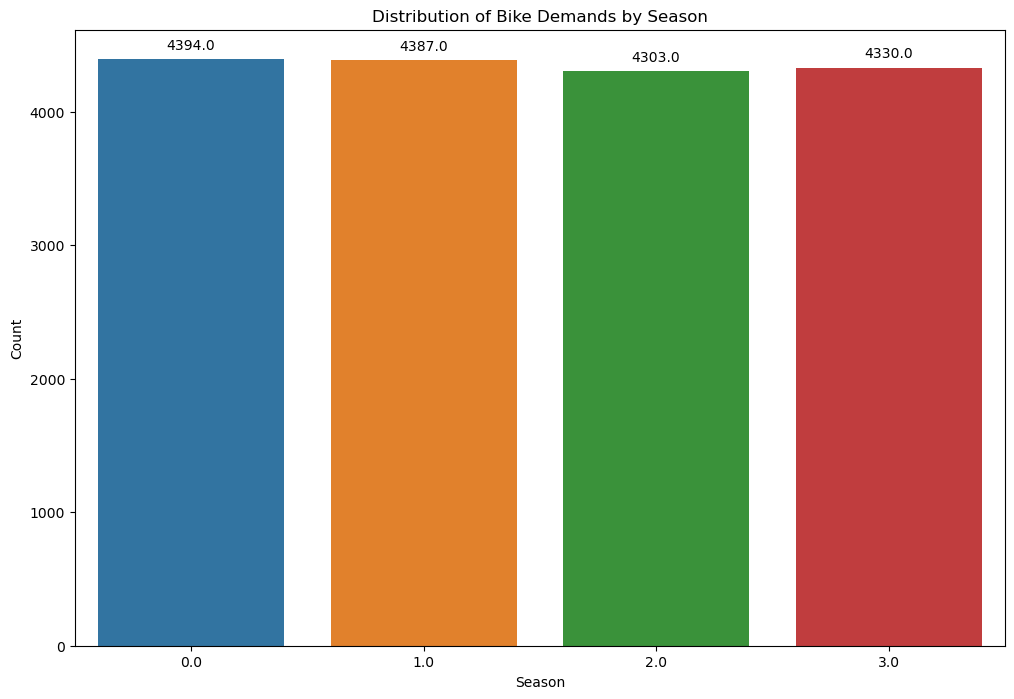

In [4]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x = df.season);
plt.title('Distribution of Bike Demands by Season')
plt.xlabel('Season')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

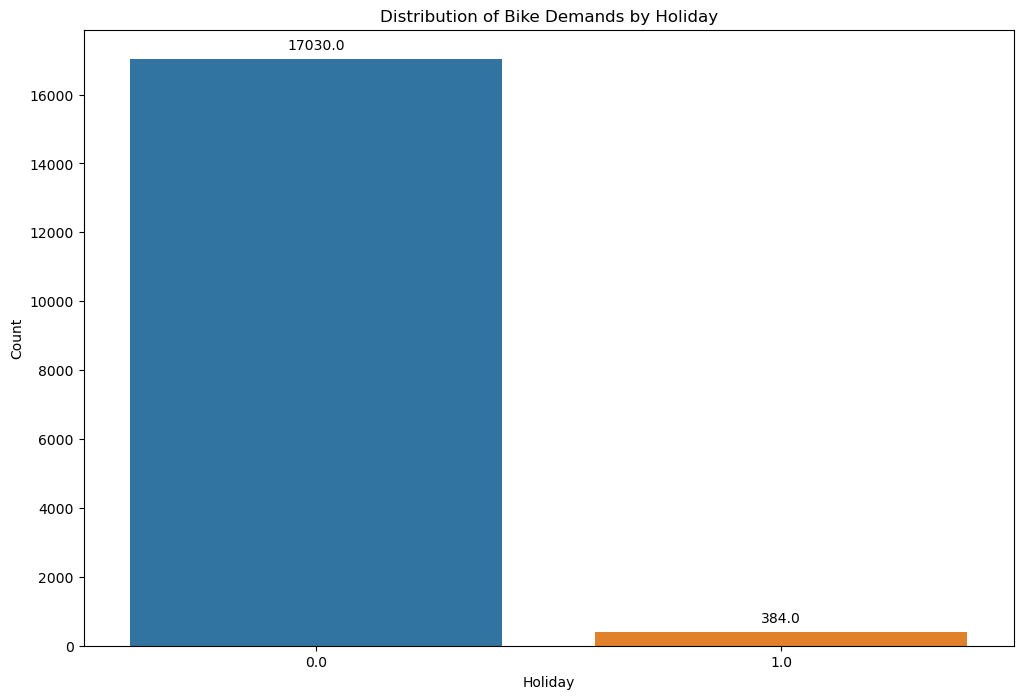

In [5]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x = df.is_holiday);
plt.title('Distribution of Bike Demands by Holiday')
plt.xlabel('Holiday')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

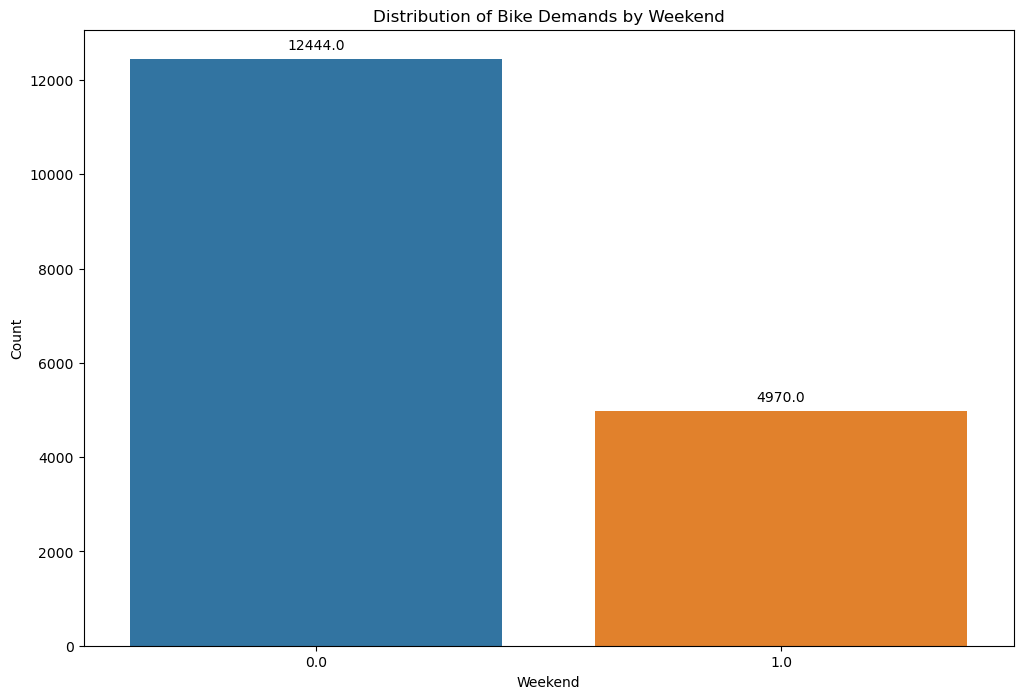

In [6]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x = df.is_weekend);
plt.title('Distribution of Bike Demands by Weekend')
plt.xlabel('Weekend')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

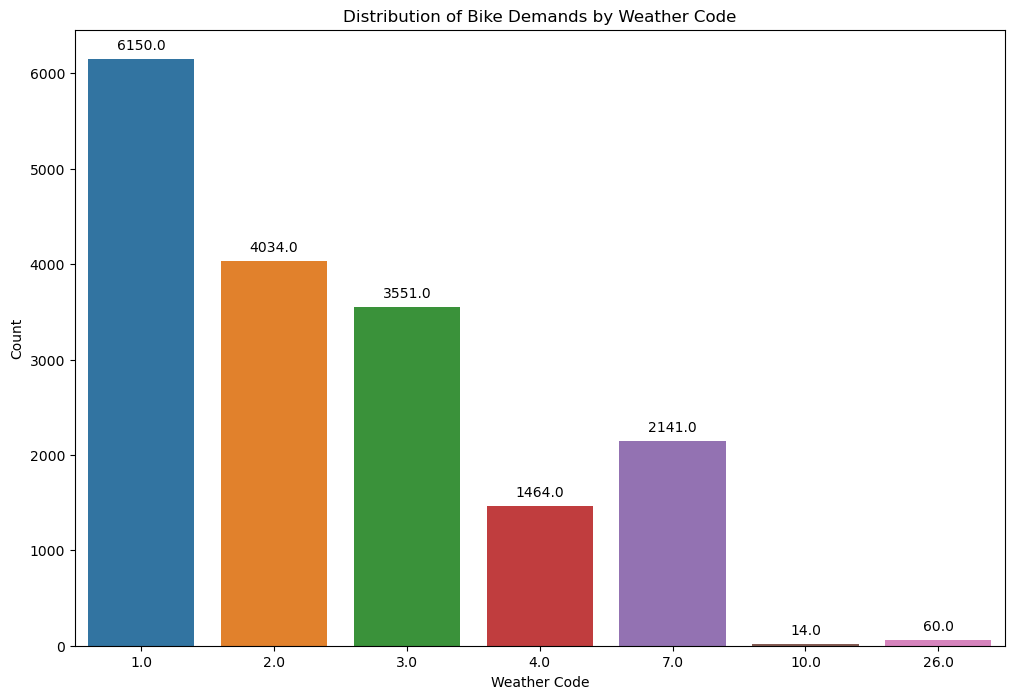

In [7]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x = df.weather_code);
plt.title('Distribution of Bike Demands by Weather Code')
plt.xlabel('Weather Code')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

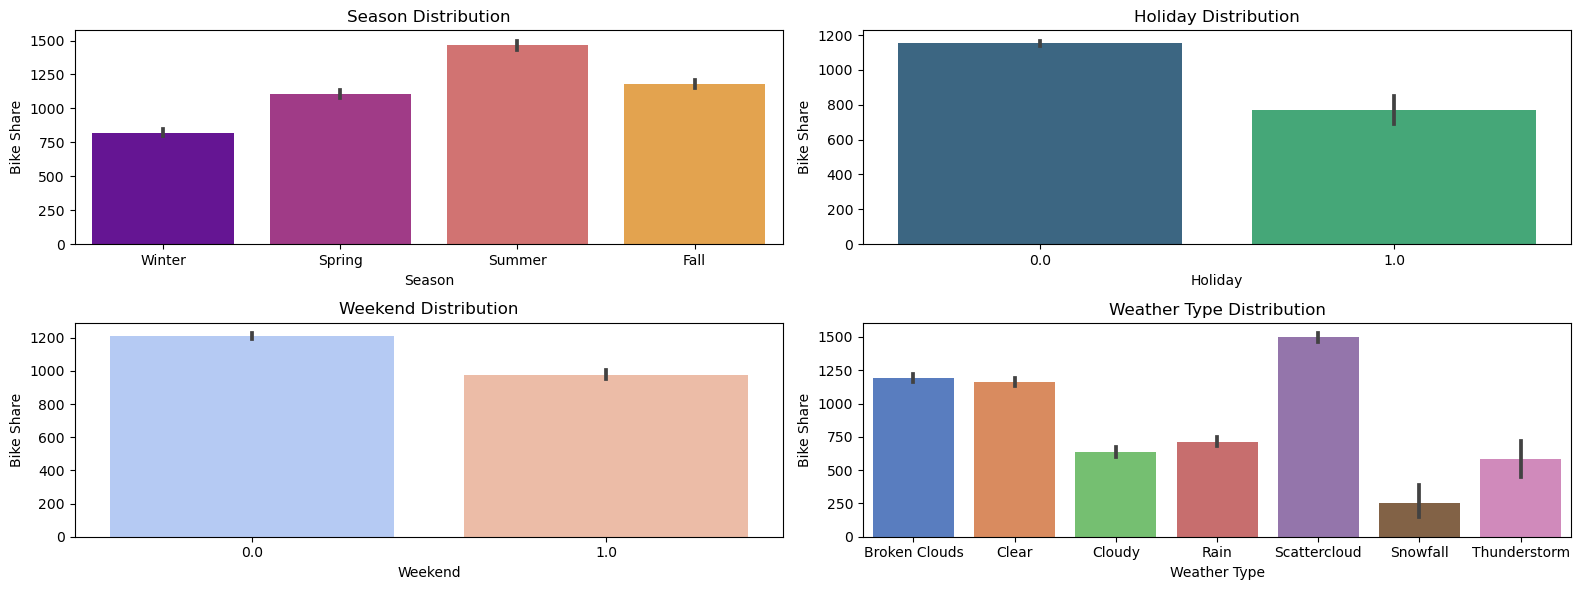

In [8]:
# Season sütununun dağılım grafiği
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 6))

season_mapping = {0: 'Spring', 1: 'Summer', 2: 'Fall', 3: 'Winter'}

sns.barplot(x=df.season.map(season_mapping), y="cnt", data=df, ax=axes[0][0], palette="plasma")
axes[0][0].set_title('Season Distribution')
axes[0][0].set_xlabel('Season')
axes[0][0].set_ylabel('Bike Share')

# Holiday sütununun dağılım grafiği
sns.barplot(x='is_holiday', data=df, y="cnt", ax=axes[0][1], palette="viridis")
axes[0][1].set_title('Holiday Distribution')
axes[0][1].set_xlabel('Holiday')
axes[0][1].set_ylabel('Bike Share')

# Weekend sütununun dağılım grafiği
sns.barplot(x='is_weekend', data=df, y="cnt", ax=axes[1][0], palette="coolwarm")
axes[1][0].set_title('Weekend Distribution')
axes[1][0].set_xlabel('Weekend')
axes[1][0].set_ylabel('Bike Share')

# Weather Code sütununun dagilim grafigi
weather_mapping = {1: 'Clear', 2: 'Scattercloud', 3: "Broken Clouds", 4: "Cloudy", 7: "Rain", 10: "Thunderstorm", 26: "Snowfall", 94: "Freezing Fog"}

sns.barplot(x=df['weather_code'].map(weather_mapping), y="cnt", data=df, ax=axes[1][1], palette="muted")
axes[1][1].set_title("Weather Type Distribution")
axes[1][1].set_xlabel('Weather Type')
axes[1][1].set_ylabel('Bike Share')

plt.tight_layout();
plt.show()

# weather_code
sns.countplot(x='weather_code',data=df)

1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
2 = scattered clouds / few clouds
3 = Broken clouds
4 = Cloudy
7 = Rain/ light Rain shower/ Light rain
10 = rain with thunderstorm
26 = snowfall
94 = Freezing Fog

<div class="alert alert-warning alert-info">
<span style=" color:red">5. Look at the data type of each variable, transform timestamp in type, and set it as index.
</span>

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


<div class="alert alert-warning alert-info">
<span style=" color:red">6. Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)
</span>

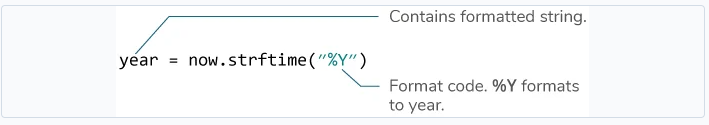

In [10]:
df.timestamp = pd.to_datetime(df.timestamp)

In [11]:
df.insert(1, 'date', df['timestamp'].dt.date)
df.insert(2, 'time', df['timestamp'].dt.time)

In [12]:
df.insert(2,'year', df['timestamp'].dt.year)
df.insert(3, 'month', df['timestamp'].dt.month)
df.insert(4, 'day', df['timestamp'].dt.day)

In [13]:
df.insert(14, "cnt", df.pop("cnt"))

In [14]:
df.set_index('timestamp', inplace=True)
df

,date,year,month,day,time,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,cnt
timestamp,,,,,,,,,,,,,,
2015-01-04 00:00:00,2015-01-04,2015,1,4,00:00:00,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,182
2015-01-04 01:00:00,2015-01-04,2015,1,4,01:00:00,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,138
2015-01-04 02:00:00,2015-01-04,2015,1,4,02:00:00,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,134
2015-01-04 03:00:00,2015-01-04,2015,1,4,03:00:00,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,72
2015-01-04 04:00:00,2015-01-04,2015,1,4,04:00:00,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,2017-01-03,2017,1,3,19:00:00,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,1042
2017-01-03 20:00:00,2017-01-03,2017,1,3,20:00:00,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,541
2017-01-03 21:00:00,2017-01-03,2017,1,3,21:00:00,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,337


<div class="alert alert-warning alert-info">
<span style=" color:red">7. Visualize the correlation with a heatmap
</span>

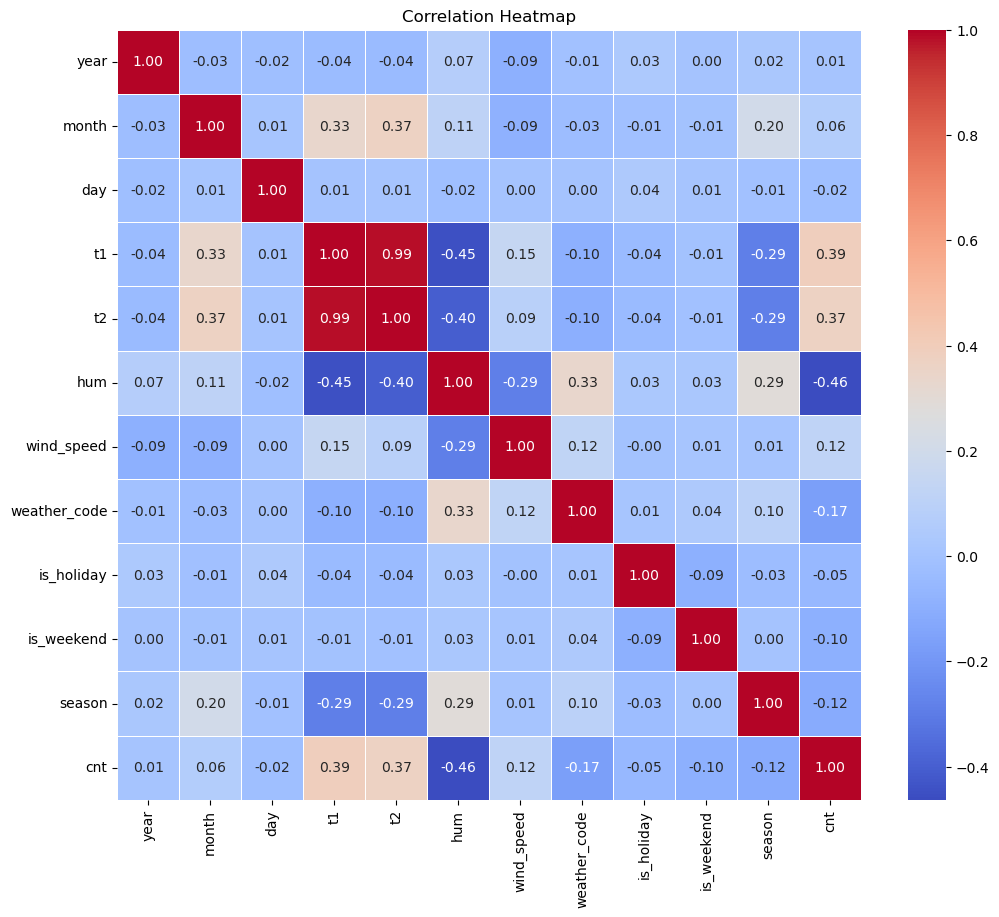

In [15]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.select_dtypes("number").corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red">8. Visualize the correlation of the target variable and the other features with barplot
</span>

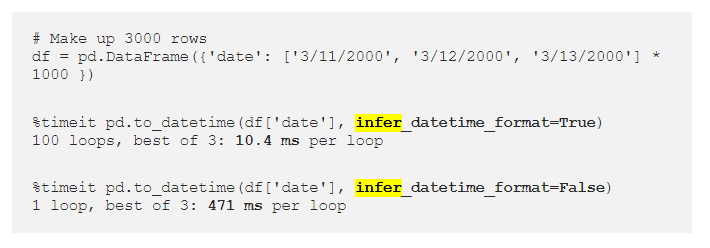

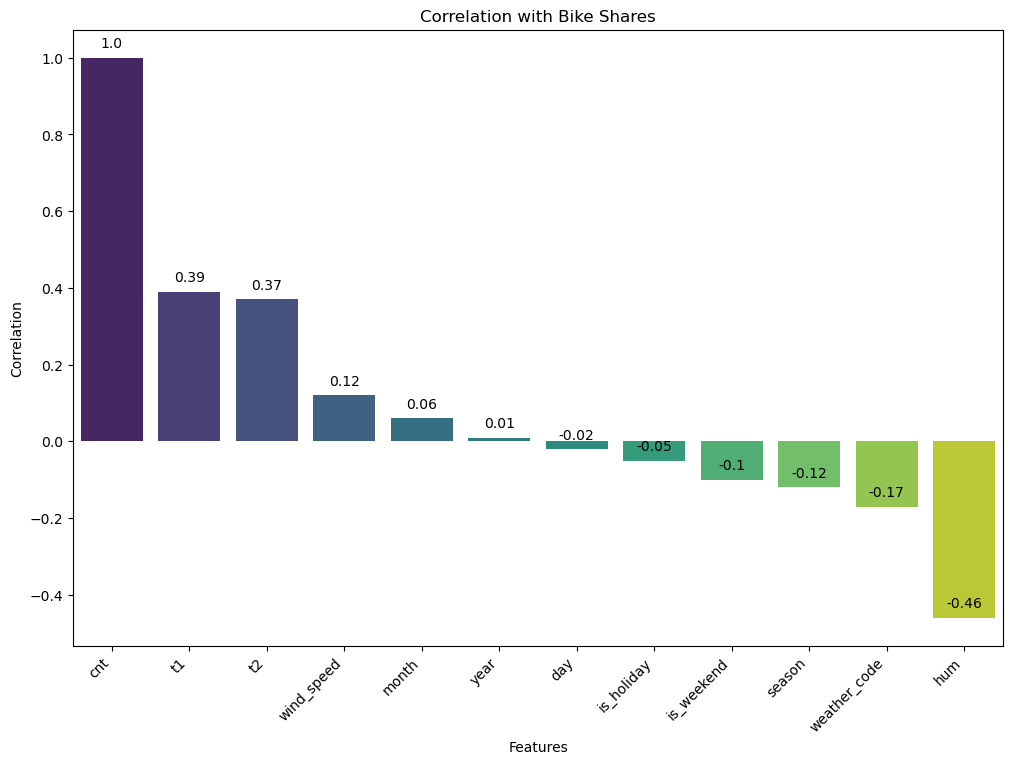

In [16]:
# 'cnt' ile diğer özelliklerin korelasyonunu hesapla
correlation_matrix = round(df.select_dtypes("number").corr(), 2)
# 'cnt' ile korelasyonunun büyüklüğünü al
correlation_with_cnt = correlation_matrix['cnt'].sort_values(ascending=False)
# Korelasyonu barplot ile görselleştir
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=correlation_with_cnt.index, y=correlation_with_cnt.values, palette='viridis')
plt.title('Correlation with Bike Shares')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red">9. Plot bike shares over time use lineplot.
</span>

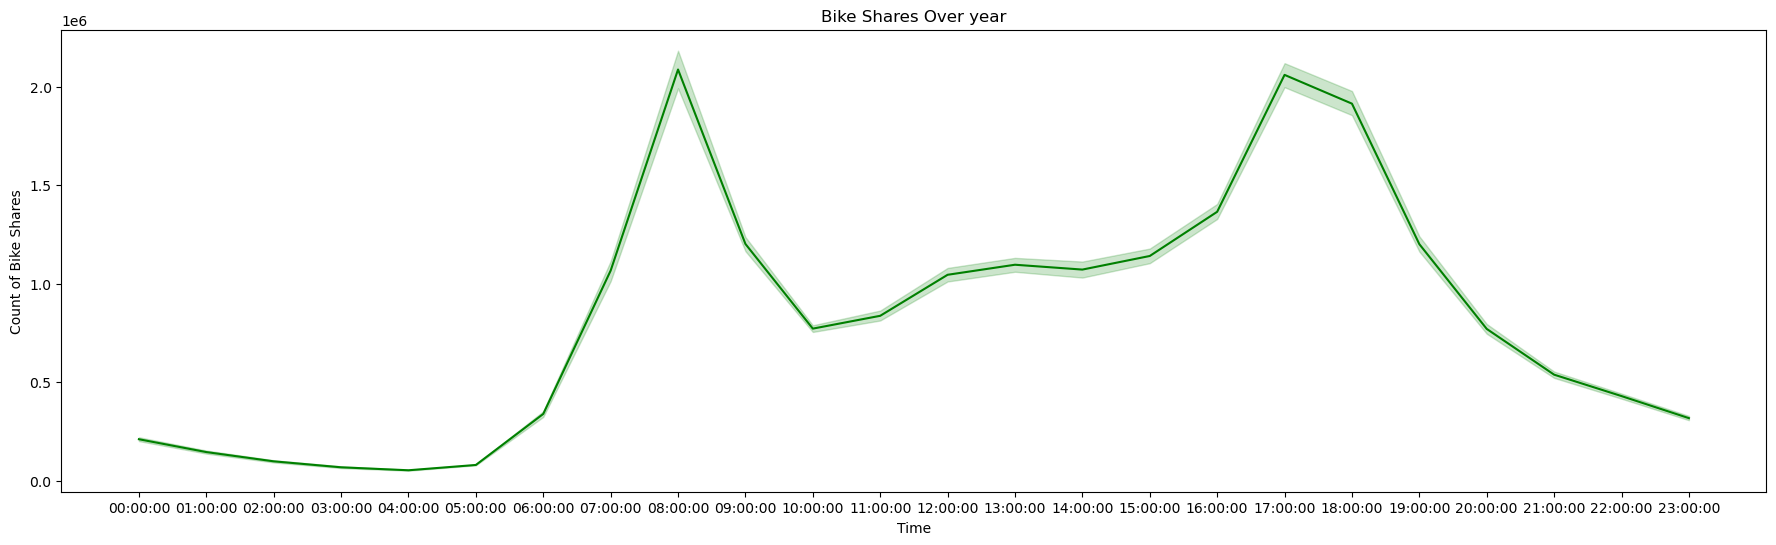

In [17]:
plt.figure(figsize=(22, 6))
sns.lineplot(x=df.time.astype(str), y='cnt', data=df, color='green', markers=True, estimator=sum)
plt.title('Bike Shares Over year')
plt.xlabel('Time')
plt.ylabel('Count of Bike Shares')
plt.tight_layout
plt.show()

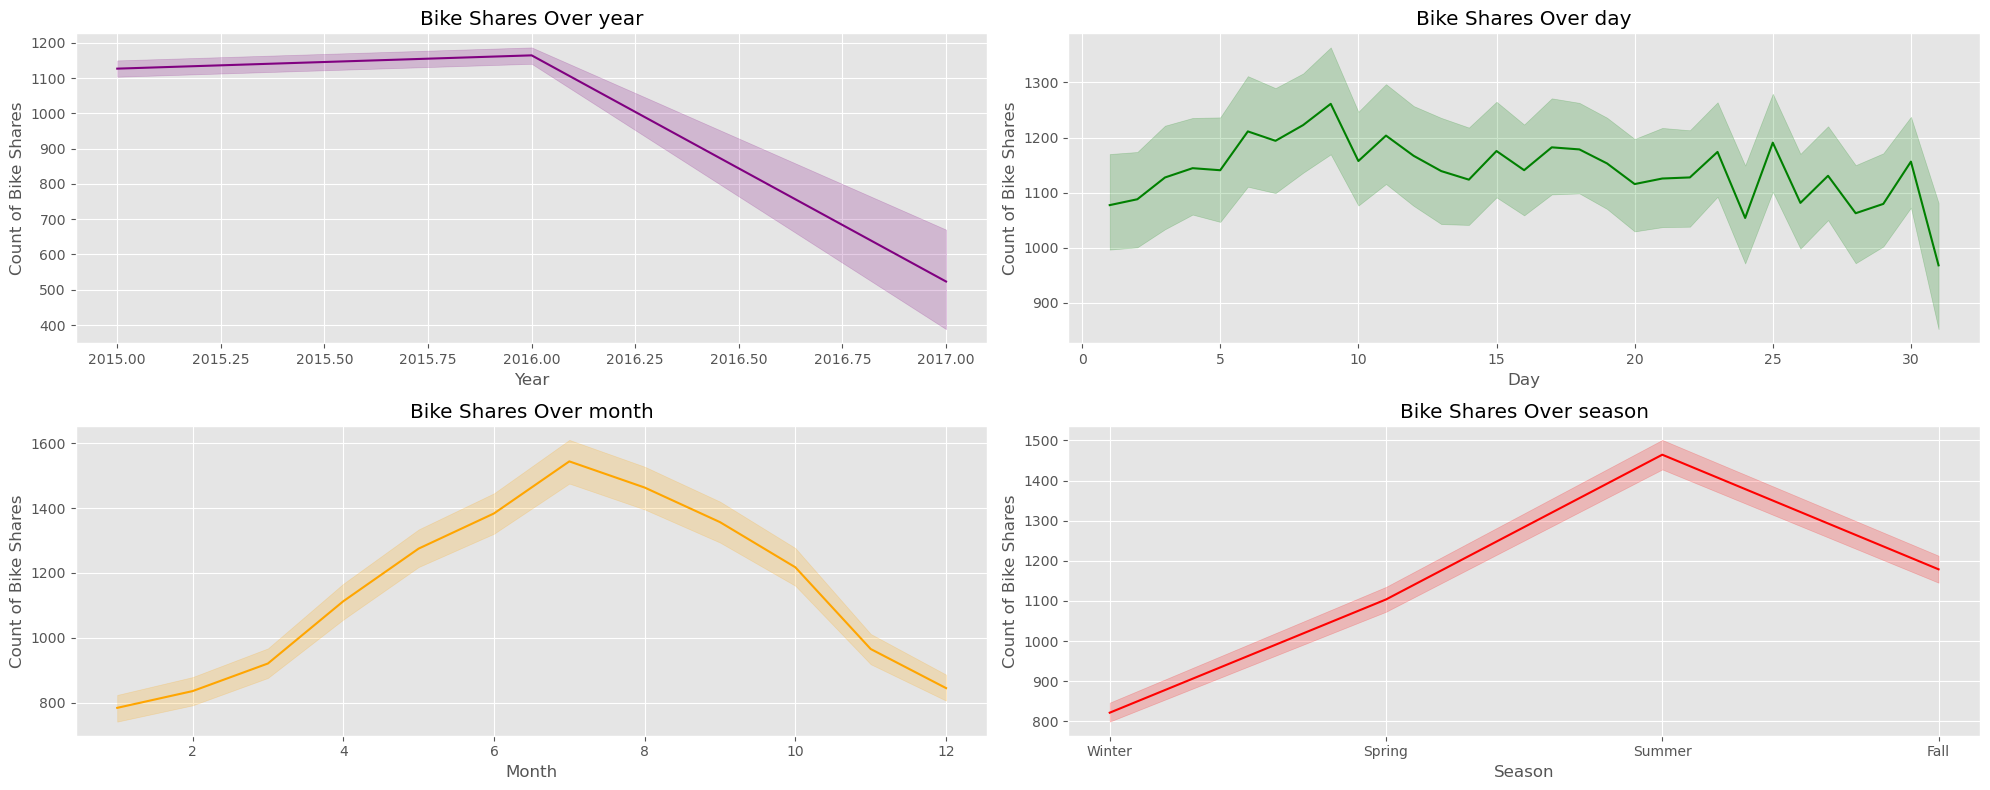

In [34]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 8))
season_mapping = {0: 'Spring', 1: 'Summer', 2: 'Fall', 3: 'Winter'}

# Bisiklet paylaşımlarını zaman içinde görselleştirme
sns.lineplot(x='year', y='cnt', data=df, color='purple', ax=axes[0][0])
axes[0][0].set_title('Bike Shares Over year')
axes[0][0].set_xlabel('Year')
axes[0][0].set_ylabel('Count of Bike Shares')
plt.style.use('ggplot')
# Bisiklet paylaşımlarını zaman içinde görselleştirme
sns.lineplot(x='month', y='cnt', data=df, color='orange', ax=axes[1][0])
axes[1][0].set_title('Bike Shares Over month')
axes[1][0].set_xlabel('Month')
axes[1][0].set_ylabel('Count of Bike Shares')

# Bisiklet paylaşımlarını zaman içinde görselleştirme
sns.lineplot(x='day', y='cnt', data=df, color='green', ax=axes[0][1])
axes[0][1].set_title('Bike Shares Over day')
axes[0][1].set_xlabel('Day')
axes[0][1].set_ylabel('Count of Bike Shares')

# Bisiklet paylaşımlarını zaman içinde görselleştirme
sns.lineplot(x=df['season'].map(season_mapping), y='cnt', data=df, color='red', ax=axes[1][1])
axes[1][1].set_title('Bike Shares Over season')
axes[1][1].set_xlabel('Season')
axes[1][1].set_ylabel('Count of Bike Shares')

plt.tight_layout()
plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red">10. Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot).
</span>

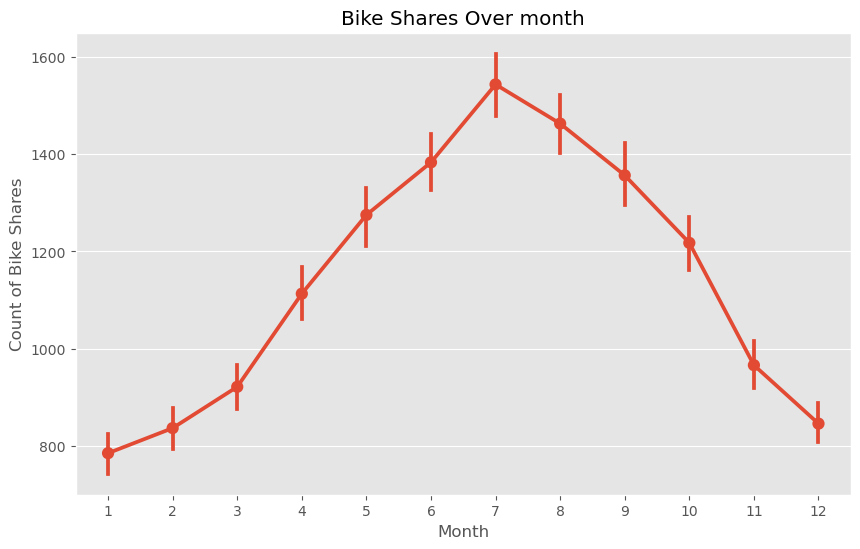

In [19]:
plt.figure(figsize=(10, 6))
sns.pointplot(x="month", y='cnt', data=df)
plt.title('Bike Shares Over month')
plt.xlabel('Month')
plt.ylabel('Count of Bike Shares')
plt.show()

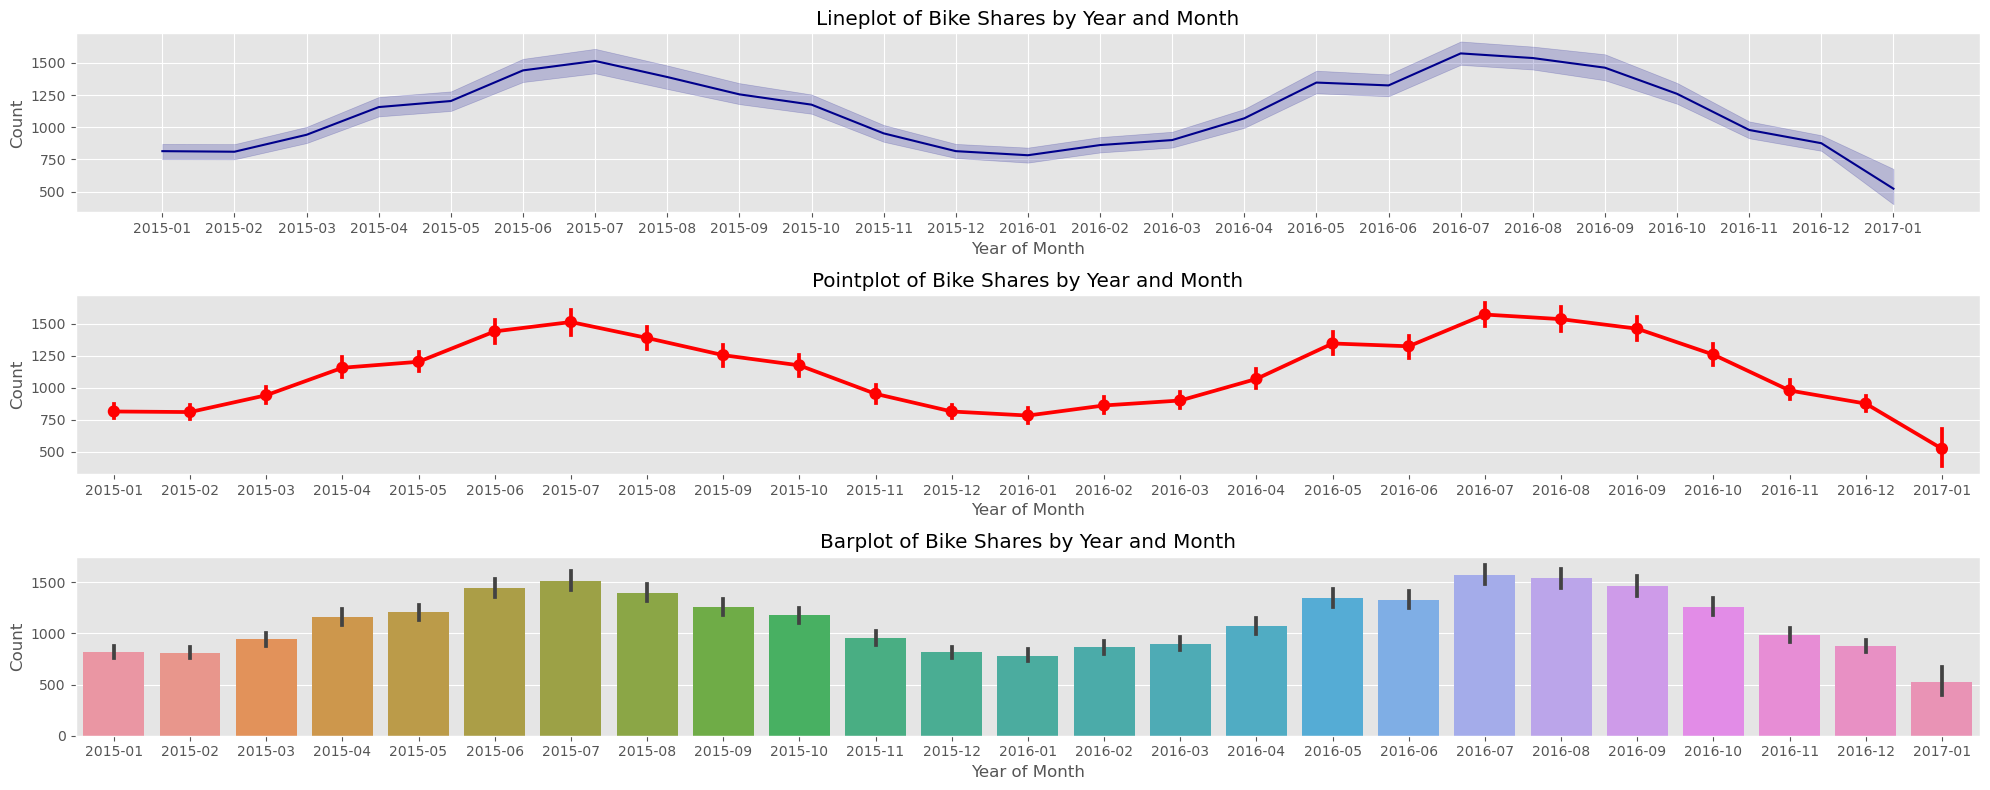

In [20]:
df['year_of_month'] = df.index.to_period('M').astype(str)

# Plotting using Seaborn
plt.figure(figsize=(20, 8))

# Lineplot
plt.subplot(3, 1, 1)
sns.lineplot(data=df, x='year_of_month', y='cnt', color="darkblue")
plt.title('Lineplot of Bike Shares by Year and Month')

plt.xlabel('Year of Month')
plt.ylabel('Count')

# Pointplot
plt.subplot(3, 1, 2)
sns.pointplot(data=df, x='year_of_month', y='cnt', color="red")
plt.title('Pointplot of Bike Shares by Year and Month')

plt.xlabel('Year of Month')
plt.ylabel('Count')

# Barplot
plt.subplot(3, 1, 3)
sns.barplot(data=df, x='year_of_month', y='cnt')
plt.title('Barplot of Bike Shares by Year and Month')

plt.xlabel('Year of Month')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17414 entries, 2015-01-04 00:00:00 to 2017-01-03 23:00:00
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           17414 non-null  object 
 1   year           17414 non-null  int32  
 2   month          17414 non-null  int32  
 3   day            17414 non-null  int32  
 4   time           17414 non-null  object 
 5   t1             17414 non-null  float64
 6   t2             17414 non-null  float64
 7   hum            17414 non-null  float64
 8   wind_speed     17414 non-null  float64
 9   weather_code   17414 non-null  float64
 10  is_holiday     17414 non-null  float64
 11  is_weekend     17414 non-null  float64
 12  season         17414 non-null  float64
 13  cnt            17414 non-null  int64  
 14  year_of_month  17414 non-null  object 
dtypes: float64(8), int32(3), int64(1), object(3)
memory usage: 1.9+ MB


<div class="alert alert-warning alert-info">
<span style=" color:red">11. Plot bike shares by hours on (holidays, weekend, season).
</span>

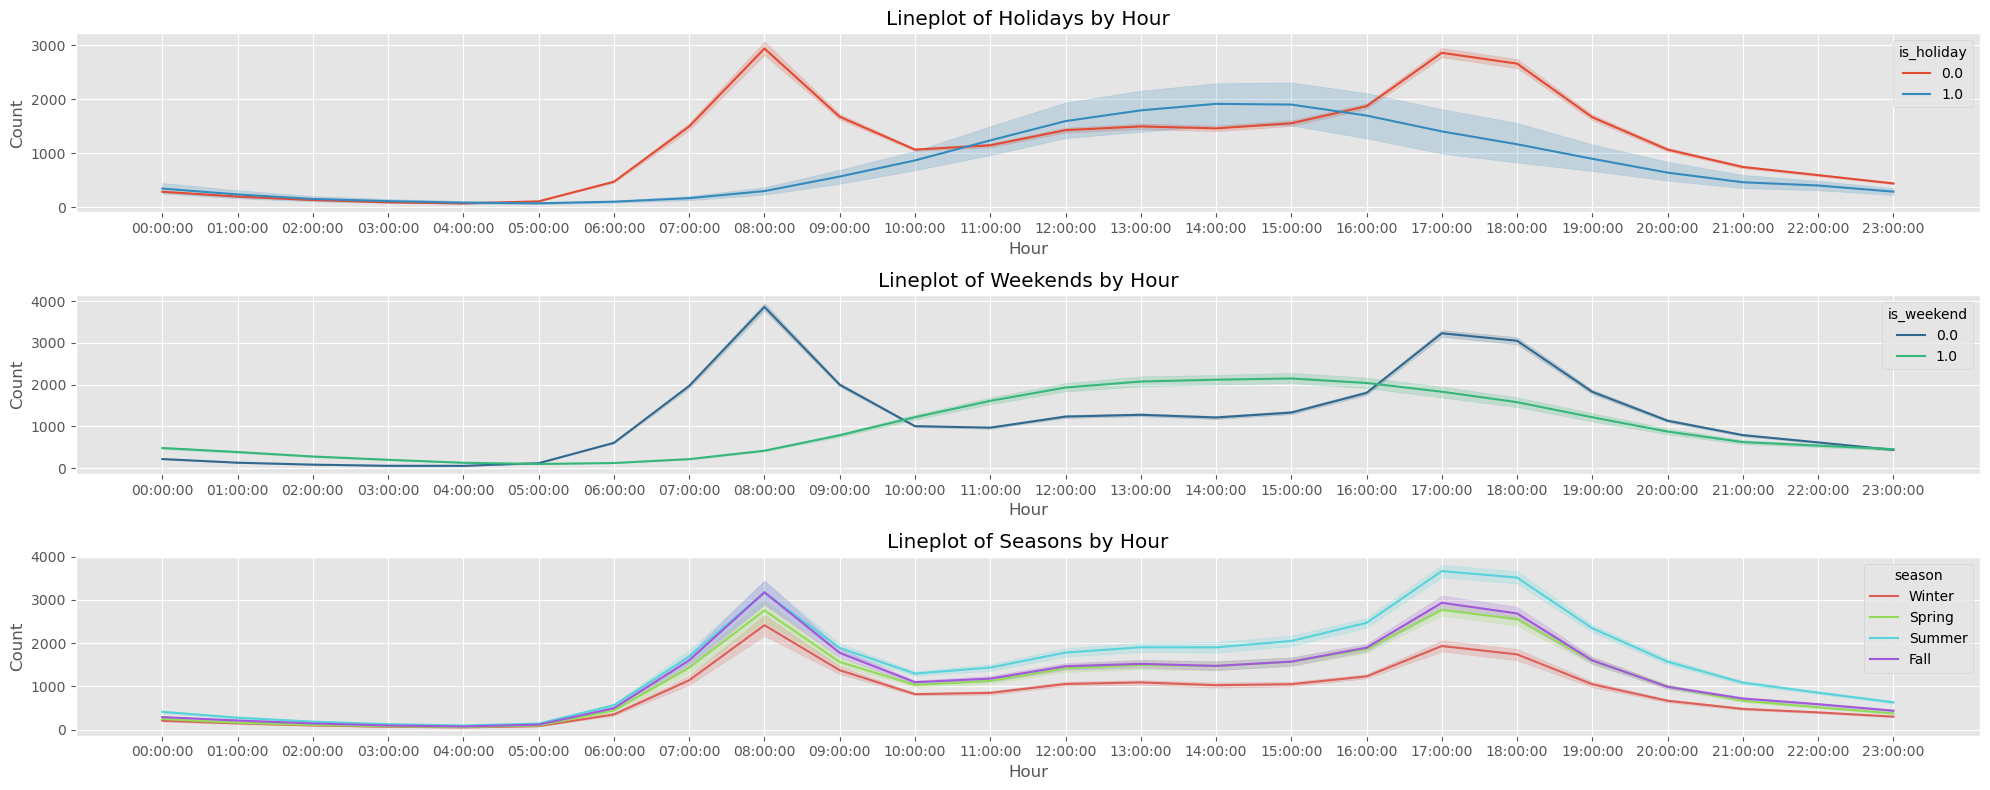

In [46]:
# Plotting using Seaborn
plt.figure(figsize=(20, 8))
season_mapping = {0: 'Spring', 1: 'Summer', 2: 'Fall', 3: 'Winter'}

# Lineplot
plt.subplot(3, 1, 1)
sns.lineplot(y=df.cnt, x=df.time.astype(str), color="red", hue=df.is_holiday)
plt.title('Lineplot of Holidays by Hour')

plt.xlabel('Hour')
plt.ylabel('Count')

# Pointplot
plt.subplot(3, 1, 2)
sns.lineplot(y=df.cnt, x=df.time.astype(str), hue=df.is_weekend, palette="viridis")
plt.title('Lineplot of Weekends by Hour')

plt.xlabel('Hour')
plt.ylabel('Count')

# Barplot
plt.subplot(3, 1, 3)
sns.lineplot(y=df.cnt, x=df.time.astype(str), palette="hls", hue=df['season'].map(season_mapping))
plt.title('Lineplot of Seasons by Hour')

plt.xlabel('Hour')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red"> 12. Plot bike shares by day of week.

- You may want to see whether it is a holiday or not
</span>

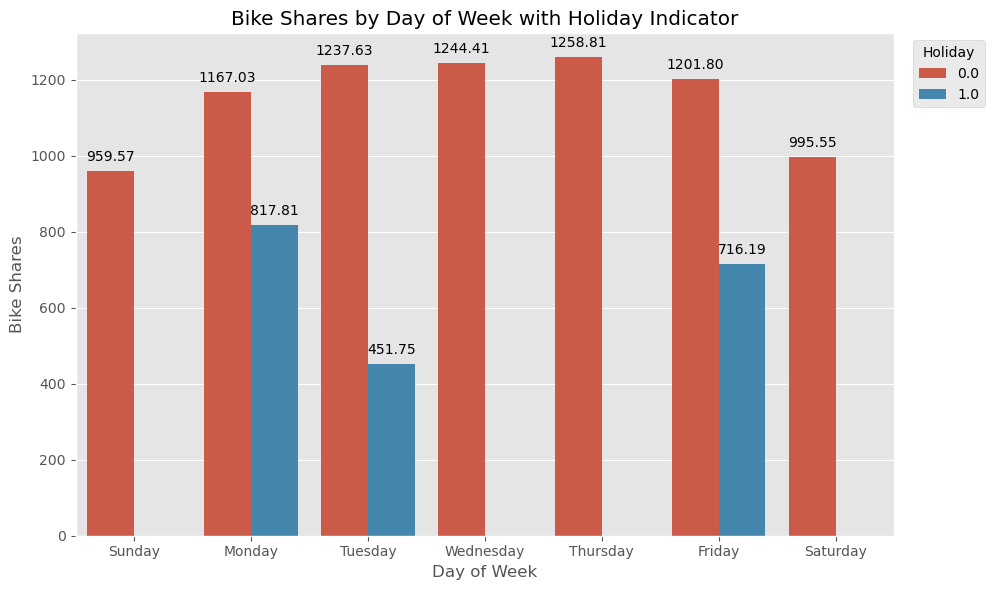

In [58]:
df['day_of_week'] = df.index.day_name()
plt.figure(figsize=(10, 6))

ax = sns.barplot(data=df, x='day_of_week', y=df.cnt, hue='is_holiday', ci=None)
plt.title('Bike Shares by Day of Week with Holiday Indicator')
plt.xlabel('Day of Week')
plt.ylabel('Bike Shares')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
plt.legend(bbox_to_anchor=(0.62, 0.5, 0.5, 0.5), title='Holiday')
plt.tight_layout()
plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red"> 13. Plot bike shares by day of month
</span>

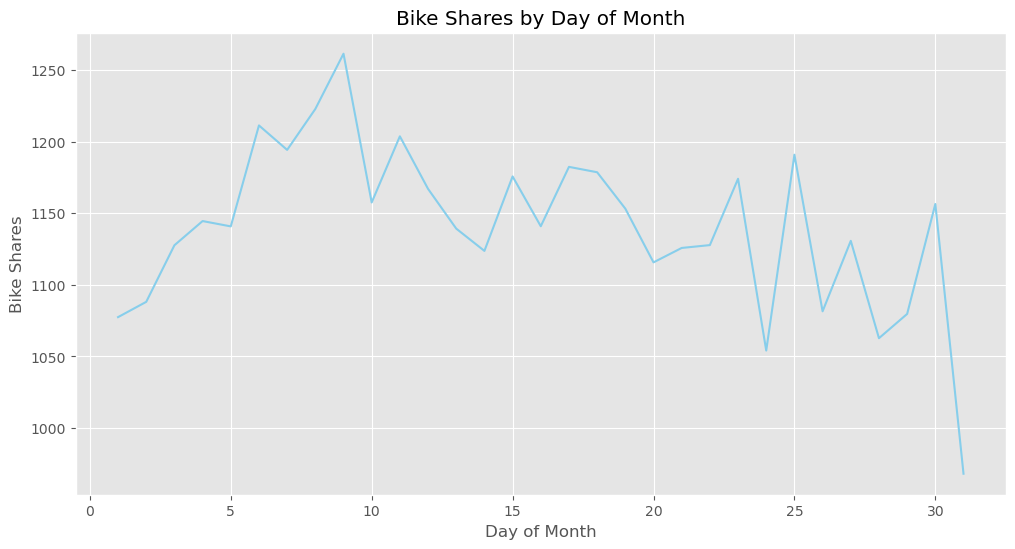

In [24]:
df['day_of_month'] = df.index.day

plt.figure(figsize=(12, 6))

sns.lineplot(data=df, x='day_of_month', y='cnt', ci=None, color='skyblue', markers=True)
plt.title('Bike Shares by Day of Month')
plt.xlabel('Day of Month')
plt.ylabel('Bike Shares')

plt.show()

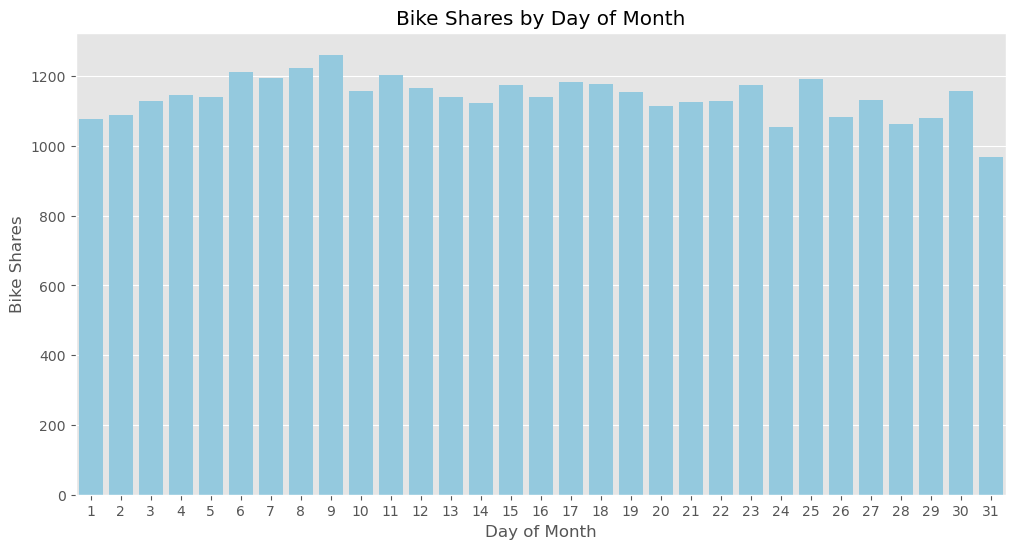

In [25]:
df['day_of_month'] = df.index.day

plt.figure(figsize=(12, 6))

sns.barplot(data=df, x='day_of_month', y='cnt', ci=None, color='skyblue')
plt.title('Bike Shares by Day of Month')
plt.xlabel('Day of Month')
plt.ylabel('Bike Shares')

plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red"> 14. Plot bike shares by year

- Plot bike shares on holidays by seasons
</span>

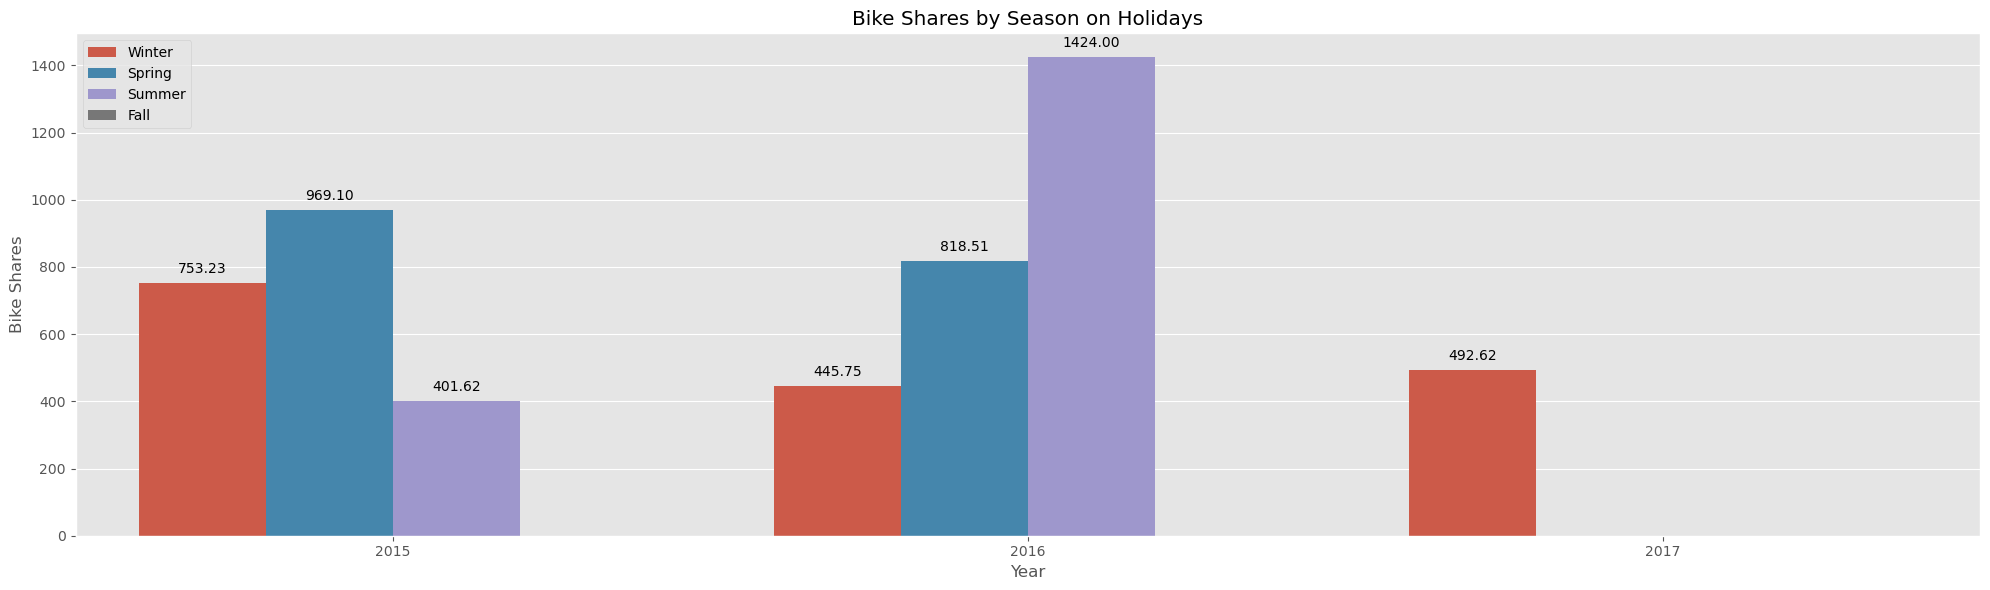

In [62]:
season_mapping = {0: 'Spring', 1: 'Summer', 2: 'Fall', 3: 'Winter'}
plt.figure(figsize=(20, 6))
ax = sns.barplot(x='year', y="cnt", hue= df['season'].map(season_mapping) , data=df[df['is_holiday'] == 1], ci=None)
plt.title('Bike Shares by Season on Holidays')
plt.xlabel('Year')
plt.ylabel('Bike Shares')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
plt.tight_layout()
plt.legend()
plt.show()

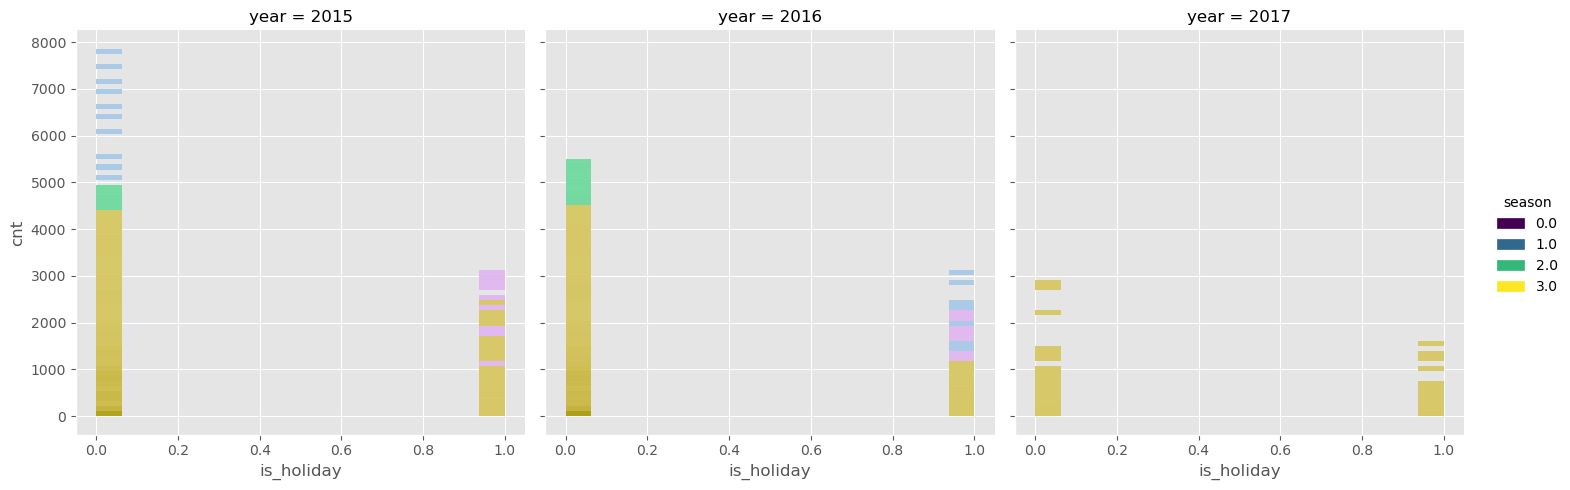

In [27]:
# Optional Graph

sns.displot(data=df, x='is_holiday', y='cnt', hue='season', palette='viridis', col="year")

<div class="alert alert-warning alert-info">
<span style=" color:red">15. Visualize the distribution of bike shares by weekday/weekend with piechart and barplot
</span>

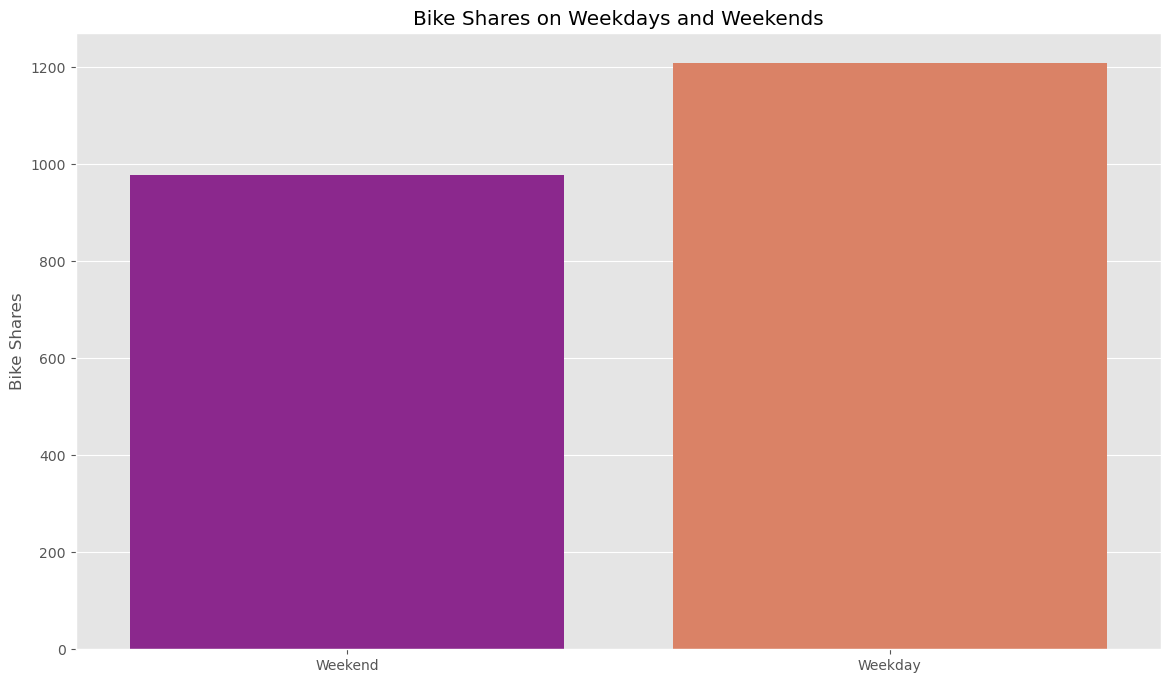

In [28]:
weekend_mapping = {0: 'Weekday', 1: 'Weekend'}
plt.figure(figsize=(14, 8))
sns.barplot(x=df['is_weekend'].map(weekend_mapping), y='cnt', ci=None, data=df, palette="plasma")
plt.title('Bike Shares on Weekdays and Weekends')
plt.xlabel('')
plt.ylabel('Bike Shares')
plt.show()

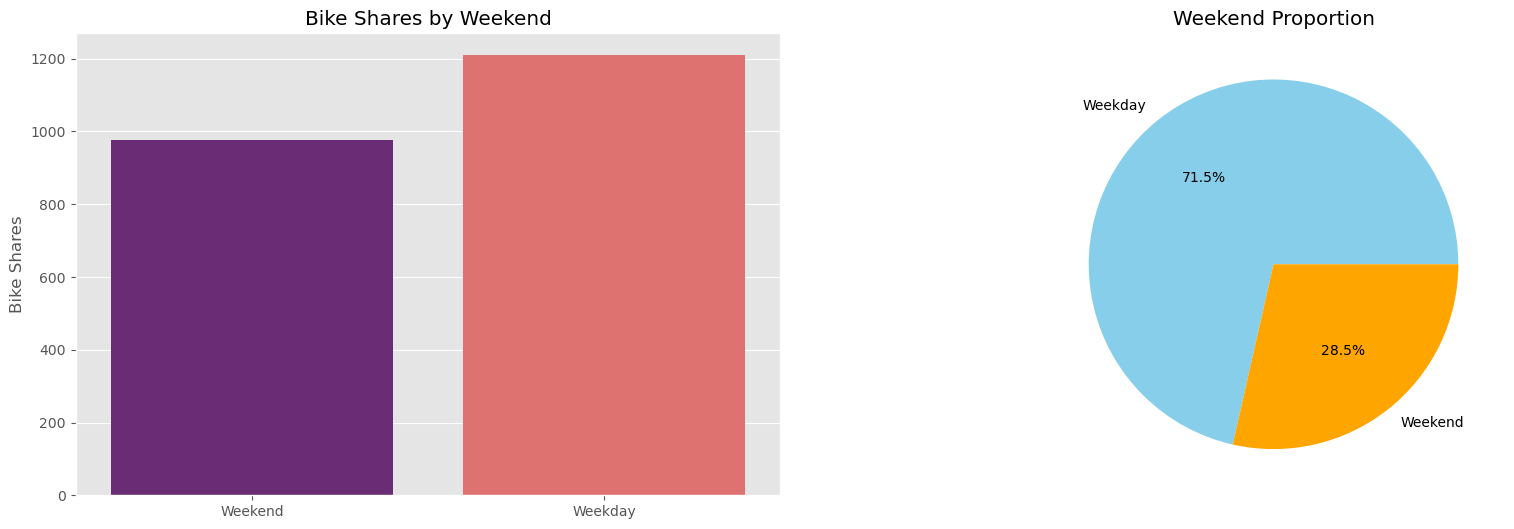

In [63]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

weekend_mapping = {0: 'Weekday', 1: 'Weekend'}

sns.barplot(x=df['is_weekend'].map(weekend_mapping), y='cnt', ci=None, data=df, palette='magma', ax=ax[0])
ax[0].set_title('Bike Shares by Weekend')
ax[0].set_xlabel("")
ax[0].set_ylabel("Bike Shares")

weekend_counts = df['is_weekend'].value_counts()
ax[1].pie(weekend_counts, labels=[weekend_mapping[key] for key in weekend_counts.index], autopct='%1.1f%%', colors=['skyblue', 'orange'])
ax[1].set_title('Weekend Proportion')
plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red">16. Plot the distribution of weather code by seasons
</span>

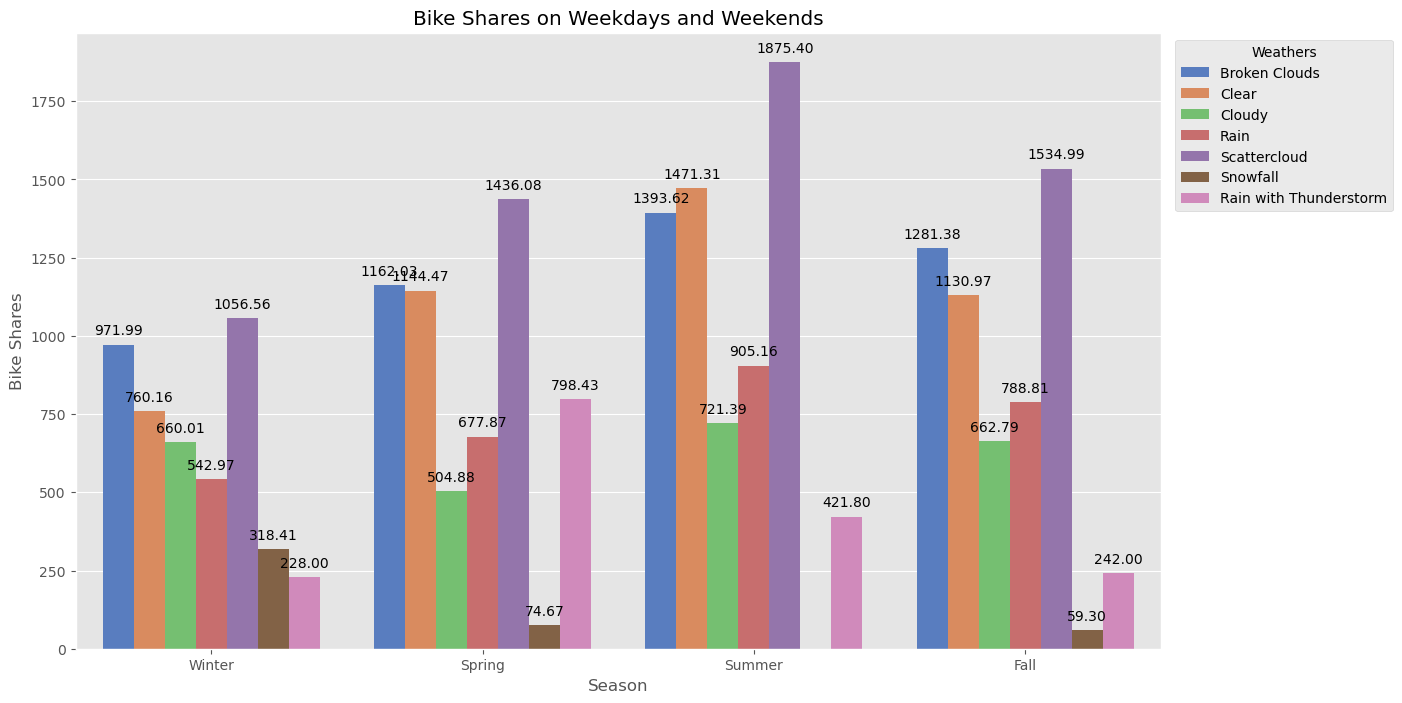

In [67]:
weather_mapping = {1: 'Clear', 2: 'Scattercloud', 3: "Broken Clouds", 4: "Cloudy", 7: "Rain", 10: "Rain with Thunderstorm", 26: "Snowfall", 94: "Freezing Fog"}
season_mapping = {0: 'Spring', 1: 'Summer', 2: 'Fall', 3: 'Winter'}
plt.figure(figsize=(14, 8))
ax = sns.barplot(x=df['season'].map(season_mapping), data=df, palette="muted", y="cnt", hue=df['weather_code'].map(weather_mapping), ci=None)
plt.title('Bike Shares on Weekdays and Weekends')
plt.xlabel('Season')
plt.ylabel('Bike Shares')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.legend(bbox_to_anchor = (0.72, 0.5, 0.5, 0.5), title= 'Weathers')
plt.show()

<div class="alert alert-info alert-info ">

# <span style=" color:red">Conclusions
    

    

</span>

<div class="alert alert-block alert-info">
<span style=" color:red">Thanks for Attending!..
    

</span>